In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
daily_activity = pd.read_csv('/Users/mariannabarreiro/Desktop/Work/Data Analysis/Google Data Analysis Course/capstone_bellabeat/fitbit_data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
hourly_calories = pd.read_csv('/Users/mariannabarreiro/Desktop/Work/Data Analysis/Google Data Analysis Course/capstone_bellabeat/fitbit_data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
hourly_steps = pd.read_csv('/Users/mariannabarreiro/Desktop/Work/Data Analysis/Google Data Analysis Course/capstone_bellabeat/fitbit_data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
sleep_day = pd.read_csv('/Users/mariannabarreiro/Desktop/Work/Data Analysis/Google Data Analysis Course/capstone_bellabeat/fitbit_data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

In [3]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
hourly_calories["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
sleep_day["SleepDay"] = pd.to_datetime(sleep_day["SleepDay"])

/var/folders/vd/91z25yss0p91t0t651xy6mf80000gn/T/ipykernel_15705/1955647011.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_calories["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
/var/folders/vd/91z25yss0p91t0t651xy6mf80000gn/T/ipykernel_15705/1955647011.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep_day["SleepDay"] = pd.to_datetime(sleep_day["SleepDay"])


In [4]:
print(daily_activity["ActivityDate"].dtypes)
print(hourly_calories["ActivityHour"].dtypes)
print(hourly_steps["ActivityHour"].dtypes)
print(sleep_day["SleepDay"].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [5]:
hourly_data = pd.merge(hourly_steps, hourly_calories, how='inner', on=['Id', 'ActivityHour'])

hourly_data.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


In [6]:
daily_activity["Day"] = daily_activity["ActivityDate"].dt.day_name()
hourly_data["Day"] = hourly_data["ActivityHour"].dt.day_name()
sleep_day["Day"] = sleep_day["SleepDay"].dt.day_name()

In [7]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [8]:
hourly_data.head()

,Id,ActivityHour,StepTotal,Calories,Day
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday


In [9]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [10]:
hourly_data["DateHour"] = hourly_data["ActivityHour"].dt.hour
hourly_data.head()

,Id,ActivityHour,StepTotal,Calories,Day,DateHour
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday,0
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday,1
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday,2
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday,3
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday,4


In [11]:
hourly_data["ActivityDate"] = hourly_data["ActivityHour"].dt.date
hourly_data.head()


,Id,ActivityHour,StepTotal,Calories,Day,DateHour,ActivityDate
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday,0,2016-04-12
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday,1,2016-04-12
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday,2,2016-04-12
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday,3,2016-04-12
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday,4,2016-04-12


In [12]:
hourly_data = hourly_data.drop("ActivityHour", axis=1)
hourly_data.head()

,Id,StepTotal,Calories,Day,DateHour,ActivityDate
0,1503960366,373,81,Tuesday,0,2016-04-12
1,1503960366,160,61,Tuesday,1,2016-04-12
2,1503960366,151,59,Tuesday,2,2016-04-12
3,1503960366,0,47,Tuesday,3,2016-04-12
4,1503960366,0,48,Tuesday,4,2016-04-12


In [13]:
hourly_data.head()

,Id,StepTotal,Calories,Day,DateHour,ActivityDate
0,1503960366,373,81,Tuesday,0,2016-04-12
1,1503960366,160,61,Tuesday,1,2016-04-12
2,1503960366,151,59,Tuesday,2,2016-04-12
3,1503960366,0,47,Tuesday,3,2016-04-12
4,1503960366,0,48,Tuesday,4,2016-04-12


In [14]:
hourly_data["ActivityDate"] = pd.to_datetime(hourly_data["ActivityDate"])

In [15]:
print(hourly_data["ActivityDate"].dtypes)

datetime64[ns]


In [16]:
hourly_data.describe()

,Id,StepTotal,Calories,DateHour,ActivityDate
count,2.209900e+04,22099.000000,22099.000000,22099.000000,22099
mean,4.848235e+09,320.166342,97.386760,11.415765,2016-04-26 00:21:45.832843264
min,1.503960e+09,0.000000,42.000000,0.000000,2016-04-12 00:00:00
25%,2.320127e+09,0.000000,63.000000,5.000000,2016-04-19 00:00:00
50%,4.445115e+09,40.000000,83.000000,11.000000,2016-04-26 00:00:00
75%,6.962181e+09,357.000000,108.000000,17.000000,2016-05-03 00:00:00
max,8.877689e+09,10554.000000,948.000000,23.000000,2016-05-12 00:00:00
std,2.422500e+09,690.384228,60.702622,6.915140,NaN


In [19]:
hourly_data.head()

,Id,StepTotal,Calories,Day,DateHour,ActivityDate
0,1503960366,373,81,Tuesday,0,2016-04-12
1,1503960366,160,61,Tuesday,1,2016-04-12
2,1503960366,151,59,Tuesday,2,2016-04-12
3,1503960366,0,47,Tuesday,3,2016-04-12
4,1503960366,0,48,Tuesday,4,2016-04-12


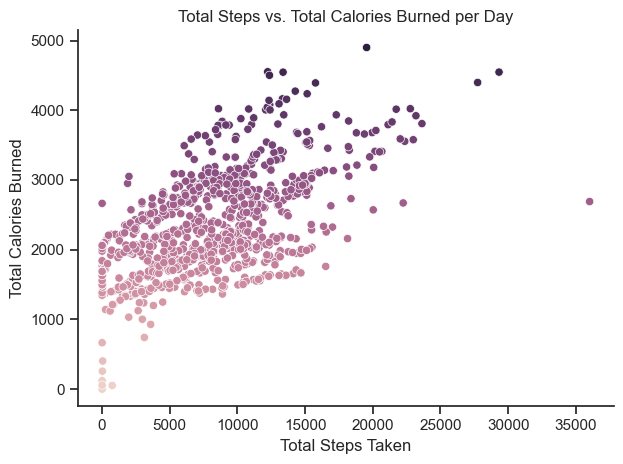

In [23]:
sns.scatterplot(data=daily_activity, x='TotalSteps', y='Calories', hue='Calories', legend=False)
sns.despine()
sns.set_theme(style='ticks')

plt.xlabel('Total Steps Taken')
plt.ylabel('Total Calories Burned')
plt.title('Total Steps vs. Total Calories Burned per Day')
plt.tight_layout()
plt.show()

In [80]:
da_table = daily_activity.groupby('Day')[['TotalSteps', 'TotalDistance', 'Calories']].agg('mean')
da_table

,TotalSteps,TotalDistance,Calories
Day,,,
Friday,7448.230159,5.309921,2331.785714
Monday,7780.866667,5.552917,2324.208333
Saturday,8152.975806,5.854677,2354.967742
Sunday,6933.231405,5.027190,2263.000000
Thursday,7405.836735,5.312245,2199.571429
Tuesday,8125.006579,5.832237,2356.013158
Wednesday,7559.373333,5.488333,2302.620000


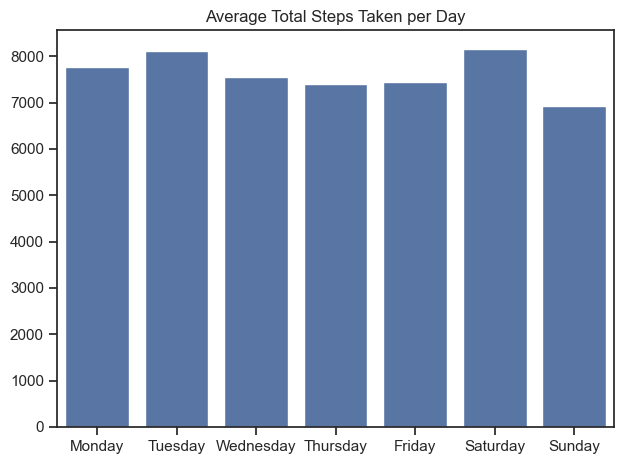

In [127]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.set_theme(style='ticks')

sns.barplot(data=da_table, x='Day', y='TotalSteps', order=day_order)

plt.xlabel('')
plt.ylabel('')
plt.title('Average Total Steps Taken per Day')
plt.tight_layout()
plt.show()

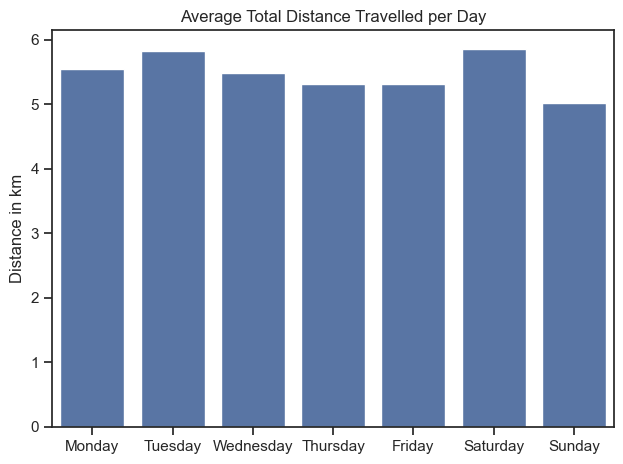

In [123]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.set_theme(style='ticks')

sns.barplot(data=da_table, x='Day', y='TotalDistance', order=day_order)

plt.xlabel('')
plt.ylabel('Distance in km')
plt.title('Average Total Distance Travelled per Day')
plt.tight_layout()
plt.show()

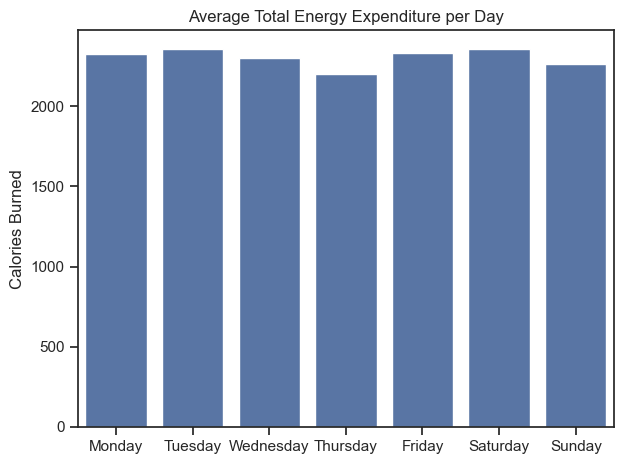

In [122]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.set_theme(style='ticks')

sns.barplot(data=da_table, x='Day', y='Calories', order=day_order)

plt.xlabel('')
plt.ylabel('Calories Burned')
plt.title('Average Total Energy Expenditure per Day')
plt.tight_layout()
plt.show()

In [97]:
hourly_table = hourly_data.groupby('DateHour')[['StepTotal', 'Calories']].agg('mean')
hourly_table = hourly_table.rename(columns={'Calories': 'CaloriesBurned'})
hourly_table

,StepTotal,CaloriesBurned
DateHour,,
0,42.188437,71.805139
1,23.102894,70.165059
2,17.110397,69.186495
3,6.426581,67.538049
4,12.699571,68.261803
5,43.869099,81.708155
6,178.508056,86.996778
7,306.049409,94.477981
8,427.544576,103.337272


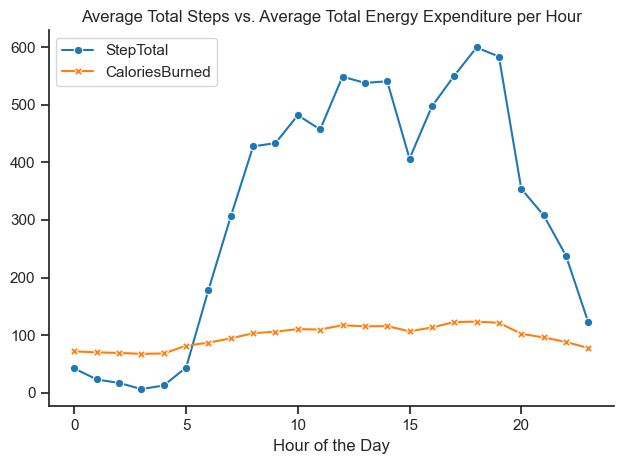

In [121]:
sns.lineplot(data=hourly_table, dashes=False, palette='tab10', markers=True)
sns.set_theme(style='ticks')
sns.despine()

plt.xlabel('Hour of the Day')
plt.ylabel('')
plt.title('Average Total Steps vs. Average Total Energy Expenditure per Hour')
plt.tight_layout()
plt.show()

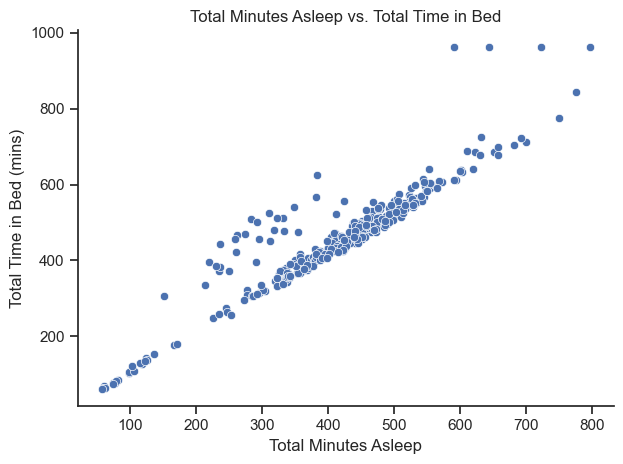

In [115]:
sns.scatterplot(data=sleep_day, x='TotalMinutesAsleep', y='TotalTimeInBed', legend=False)
sns.despine()
sns.set_theme(style='ticks')

plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Time in Bed (mins)')
plt.title('Total Minutes Asleep vs. Total Time in Bed')
plt.tight_layout()
plt.show()

In [116]:
sleepdaily = sleep_day.groupby('Day')[['TotalMinutesAsleep', 'TotalTimeInBed']].agg('mean')
sleepdaily

,TotalMinutesAsleep,TotalTimeInBed
Day,,
Friday,405.421053,445.052632
Monday,418.829787,456.170213
Saturday,420.810345,461.275862
Sunday,452.745455,503.509091
Thursday,402.369231,435.800000
Tuesday,404.538462,443.292308
Wednesday,434.681818,470.030303


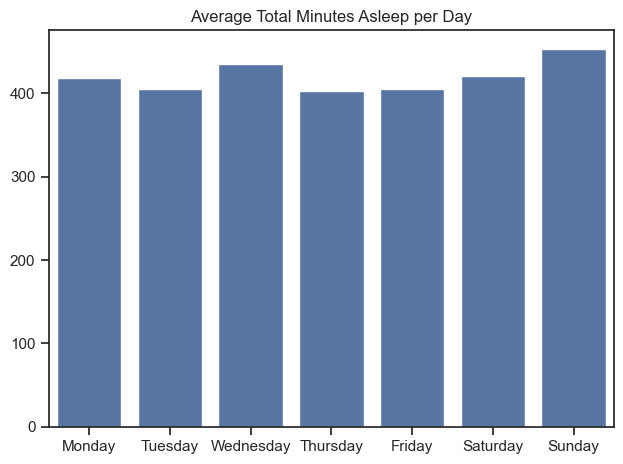

In [119]:
sns.set_theme(style='ticks')

sns.barplot(data=sleepdaily, x='Day', y='TotalMinutesAsleep', order=day_order)

plt.xlabel('')
plt.ylabel('')
plt.title('Average Total Minutes Asleep per Day')
plt.tight_layout()
plt.show()

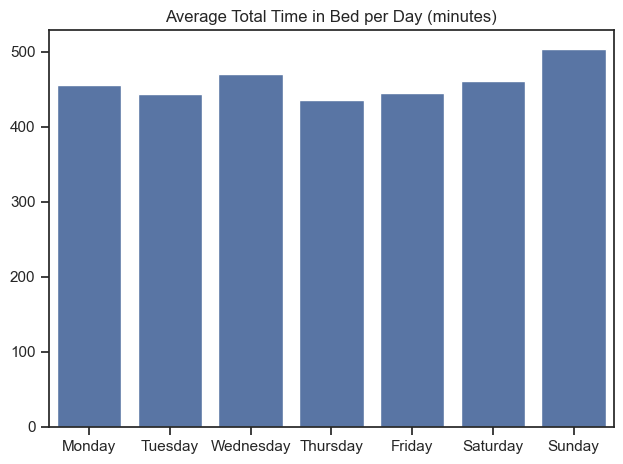

In [157]:
sns.set_theme(style='ticks')

sns.barplot(data=sleepdaily, x='Day', y='TotalTimeInBed', order=day_order)

plt.xlabel('')
plt.ylabel('')
plt.title('Average Total Time in Bed per Day (minutes)')
plt.tight_layout()
plt.show()

In [139]:
sleep_day['SleepQuality'] = 100 * sleep_day['TotalMinutesAsleep']/sleep_day['TotalTimeInBed']
activity_and_sleep = daily_activity.merge(right=sleep_day, how='inner', left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])
activity_and_sleep[['Id', 'TotalSteps', 'Calories', 'TotalMinutesAsleep', 'TotalTimeInBed', 'SleepQuality']]

,Id,TotalSteps,Calories,TotalMinutesAsleep,TotalTimeInBed,SleepQuality
0,1503960366,13162,1985,327,346,94.508671
1,1503960366,10735,1797,384,407,94.348894
2,1503960366,9762,1745,412,442,93.212670
3,1503960366,12669,1863,340,367,92.643052
4,1503960366,9705,1728,700,712,98.314607
...,...,...,...,...,...,...
408,8792009665,7174,2896,343,360,95.277778
409,8792009665,1619,1962,503,527,95.445920
410,8792009665,1831,2015,415,423,98.108747
411,8792009665,2421,2297,516,545,94.678899


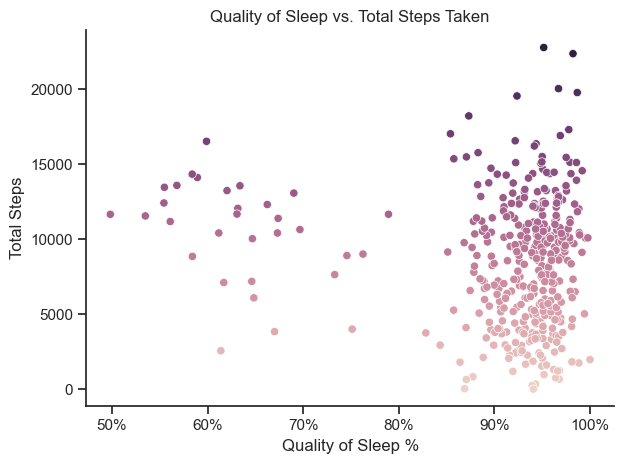

In [146]:
from matplotlib.ticker import PercentFormatter

sns.scatterplot(data=activity_and_sleep, x='SleepQuality', y='TotalSteps', hue='TotalSteps', legend=False)
sns.despine()
sns.set_theme(style='ticks')

ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Quality of Sleep %')
plt.ylabel('Total Steps')
plt.title('Quality of Sleep vs. Total Steps Taken')
plt.tight_layout()
plt.show()

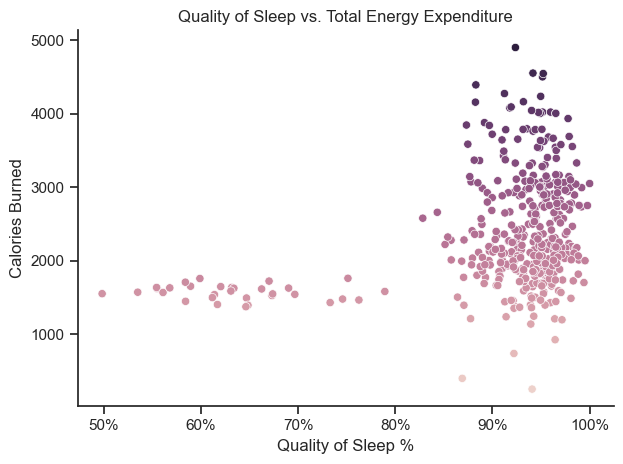

In [147]:
from matplotlib.ticker import PercentFormatter

sns.scatterplot(data=activity_and_sleep, x='SleepQuality', y='Calories', hue='Calories', legend=False)
sns.despine()
sns.set_theme(style='ticks')

ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Quality of Sleep %')
plt.ylabel('Calories Burned')
plt.title('Quality of Sleep vs. Total Energy Expenditure')
plt.tight_layout()
plt.show()